# Improvement in classification, based on feature selection
Using the information about the top
correlating features obtained in item (4), transform the full data set **`train_smpl`** so as to keep the
following attributes:
* Using only the top 5 pixels from each **`train_smpl_\<label>`**.
* Using only the top 10 pixels from each **`train_smpl_\<label>`**.
* Using only the top 20 pixels from each **`train_smpl_\<label>`**.
* You will have three data sets, with approximately 50, 100 and 200 features (pixels) each.
Repeat the experiment described in item (3) on these three data sets.

In [2]:
import numpy as np
from IPython.utils import io

In [3]:
from Scripts import pixelFinder as pf 
from Scripts.NaiveBayse import NaiveBayseGaussian as nbg
from Scripts import helperfn as hf
from Scripts import plotScripts as ps
%load_ext autoreload
%autoreload 2


In [4]:
def get_top_pixels(n):
    pixel_order = []
    for i in range(-1, 10):
        pixel_order.append(np.array(pf.bestPixels(i, n)))
    return pixel_order

def grab_n_pixels(pixel_order, n):
    output = []

    # j is the pixel order list
    for j in range(len(pixel_order)):
        output.append(pixel_order[j][:n]) 

    return output


def data_lists():
    data = []
    for i in range(-1, 10):
        data.append(helperfn.get_data(i))
    return data

# This range could be incorrect might need to be (0,12)
def build_classifiers(data, y_labels, pixel_order, result_label_set=(0,11), **kwargs):
    classifiers = []
    scores = []
    dataset = []
    for i in range(result_label_set[0], result_label_set[1]):
        X = np.take(data, pixel_order[i], axis=1)
        if X.shape[1] == 0:
            X = np.take(data, [pixel_order[i]], axis=1)
            print(X)
        print('THIS IS X', X.shape)
        y = y_labels[i]
        classifier, score, local_data = nbg.nbg_model_custom_data(X, y, data_label=i-1, **kwargs)
        classifiers += [classifier]
        scores += [score]
        dataset += [local_data]

    return classifiers, scores, dataset


def get_labels():
    labels = []
    for i in range(-1, 10):
        labels.append(hf.get_results(i))
    
    return labels

def run_classifier(x_data, y, pixel_order, n_pixels=5, verbose=False, **kwargs):
    scores_list = []
    classifiers_list = []
    data_list = []

    #pixels = grab_n_pixels(pixel_order, 0)

    # No 0 pixels so start at 1 
    for i in range(1, n_pixels + 1):
        hf.update_progress(i/(n_pixels+1), message='running all classifiers, could be slow')
        pixels = grab_n_pixels(pixel_order, i)
        #print(len(pixels))
        if not verbose:
            print('Classifying pixel: ' , i)
            with io.capture_output() as captured:
                classifier, scores, data = build_classifiers(x_data, y, pixels, **kwargs)
        else:
            classifier,  scores, data = build_classifiers(x_data, y, pixels, **kwargs)
        
        scores_list.append(scores)
        data_list.append(data)
        classifiers_list.append(classifier)
    
    return scores_list #, data_list, classifiers_list


def unzip_all_scores(scores_list):

    train_scores = []
    test_scores = []

    # loops over pixels
    for i in range(len(scores_list)):
        train, test = ps.unzip_scores(scores_list[i])
        train_scores.append(train)
        test_scores.append(test)
    
    return train_scores, test_scores


def using_n_pixelrun_classifier(x_data, y, pixel_order,best_pixel_indicies, n_pixels=5, verbose=False, **kwargs):
    scores_list = []
    classifiers_list = []
    data_list = []

    #pixels = grab_n_pixels(pixel_order, 0)

    # No 0 pixels so start at 1 
    for i in range(0, 11):
        #hf.update_progress(i/10, message='building all classifiers with best pixel amount for each')
        pixels = grab_n_pixels(pixel_order, best_pixel_indicies[i])

        if not verbose:
            print('Classifying class: ' , i)
            with io.capture_output() as captured:
                classifier, scores, data = build_classifiers(x_data, y, pixels,result_label_set=(i,i+1), **kwargs)
        else:
            classifier,  scores, data = build_classifiers(x_data, y, pixels, result_label_set=(i,i+1), **kwargs)
        
        scores_list.append(scores)
        data_list.append(data)
        classifiers_list.append(classifier)
    
    return classifiers_list, scores_list, data_list





In [5]:
pixel_order = get_top_pixels(2304)

In [6]:
labels = get_labels()
x_data = hf.get_data_noresults()

In [7]:
#pixel_order = get_top_pixels(10)



scores_list = run_classifier(x_data, labels, pixel_order,result_label_set=(0,11), n_pixels = 500, balance_classes=True, random_state=89)









running all classifiers, could be slow
Progress: [####################] 99.8%
Classifying pixel:  500


In [8]:
train_scores , test_scores = unzip_all_scores(scores_list)

### Load Data


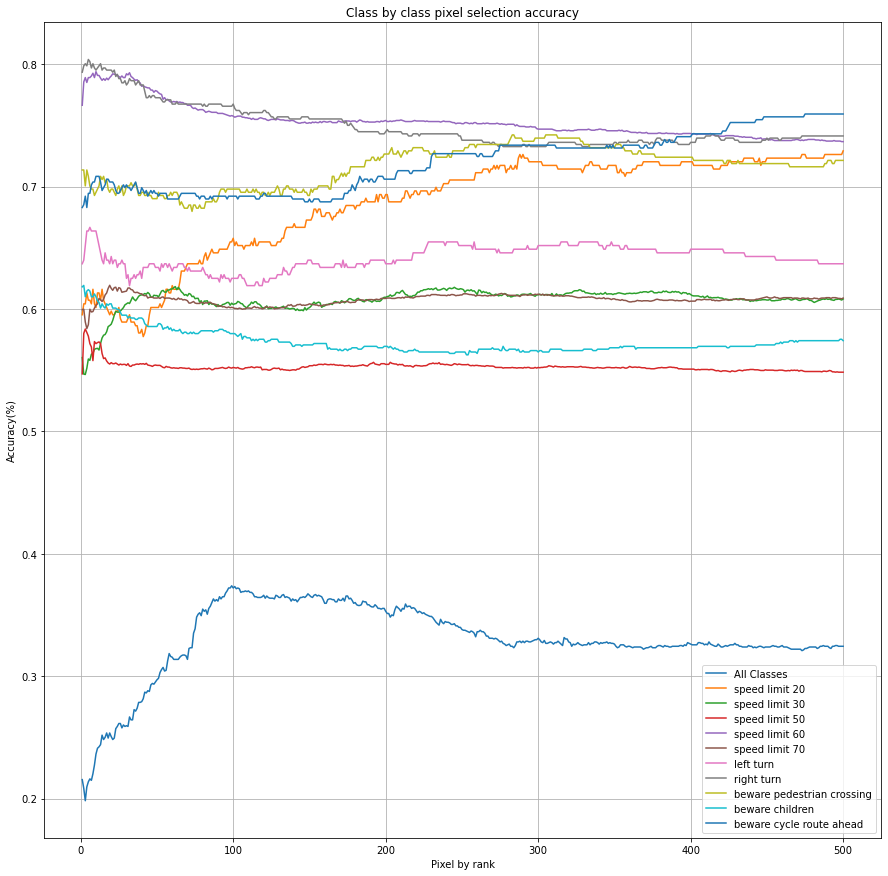

In [9]:
ps.plot_line_graph(np.array(train_scores))

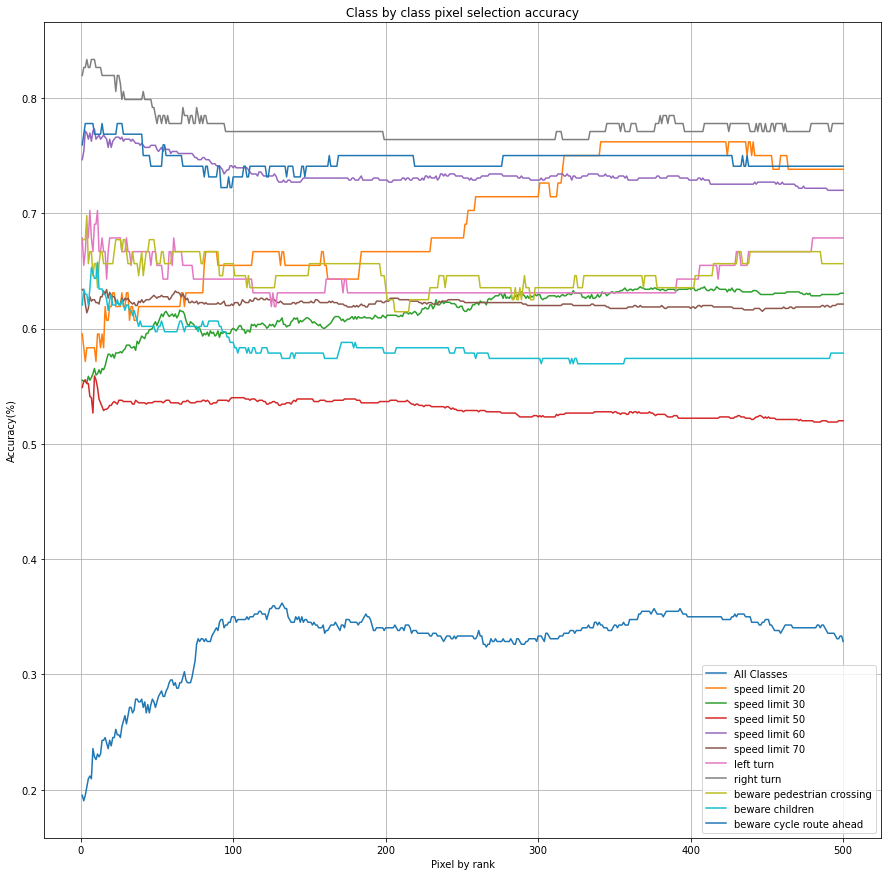

In [10]:
ps.plot_line_graph(np.array(test_scores))

In [11]:
best_pixel_depth = pf.get_best_n_pixels_all_classes(np.array(test_scores))
print(best_pixel_depth)


[132 341 367   9   9   1   6   4   4  11   3]


In [12]:
pixel_order[0][131]

610

In [13]:


output = np.take(x_data,[pixel_order[0][131]], axis=1)
output

,610
0,87.0
1,105.0
2,105.0
3,98.0
4,100.0
...,...
9685,100.0
9686,157.0
9687,101.0
9688,100.0


In [14]:

#scores_list =                                             run_classifier(x_data, labels, pixel_order,result_label_set=(0,11), n_pixels = 50)
classifiers_5_pixels, scores_5_pixels, dataset_5_pixels = build_classifiers(x_data, labels, grab_n_pixels(pixel_order, 5), balance_classes=True, random_state=89)
classifiers_10_pixels, scores_10_pixels, dataset_10_pixels = build_classifiers(x_data, labels, grab_n_pixels(pixel_order, 10), balance_classes=True, random_state=89)
classifiers_20_pixels, scores_20_pixels, dataset_20_pixels = build_classifiers(x_data, labels, grab_n_pixels(pixel_order, 20), balance_classes=True, random_state=89)
classifiers_our_pixels, scores_our_pixels, dataset_our_pixels = using_n_pixelrun_classifier(x_data, labels, grab_n_pixels(pixel_order, 500), best_pixel_depth, balance_classes=True, random_state=89, print_scores=False, verbose=True)



THIS IS X (9690, 5)
here
Scores for dataset:  All Classes
Training data score:  0.21369047619047618
Testing data score:  0.20952380952380953
--------------------------------------
THIS IS X (9690, 5)
here
Scores for dataset:  speed limit 20
Training data score:  0.6071428571428571
Testing data score:  0.5833333333333334
--------------------------------------
THIS IS X (9690, 5)
here
Scores for dataset:  speed limit 30
Training data score:  0.5591216216216216
Testing data score:  0.5585585585585585
--------------------------------------
THIS IS X (9690, 5)
here
Scores for dataset:  speed limit 50
Training data score:  0.5777777777777777
Testing data score:  0.5522222222222222
--------------------------------------
THIS IS X (9690, 5)
here
Scores for dataset:  speed limit 60
Training data score:  0.7890070921985816
Testing data score:  0.7641843971631206
--------------------------------------
THIS IS X (9690, 5)
here
Scores for dataset:  speed limit 70
Training data score:  0.58712121212

In [15]:
np.array(scores_5_pixels[1])

array([0.60714286, 0.58333333])

In [16]:
np.array(scores_our_pixels)


array([[[0.36607143, 0.36190476]],

       [[0.71428571, 0.76190476]],

       [[0.61373874, 0.63626126]],

       [[0.57333333, 0.55888889]],

       [[0.78900709, 0.77304965]],

       [[0.59943182, 0.63383838]],

       [[0.66666667, 0.70238095]],

       [[0.79861111, 0.83333333]],

       [[0.71354167, 0.69791667]],

       [[0.60648148, 0.65740741]],

       [[0.69212963, 0.77777778]]])

In [17]:
new_list = []

for i in range(0,11):
    print(scores_our_pixels[i][0])
    new_list.append(scores_our_pixels[i][0])

(0.36607142857142855, 0.3619047619047619)
(0.7142857142857143, 0.7619047619047619)
(0.6137387387387387, 0.6362612612612613)
(0.5733333333333334, 0.5588888888888889)
(0.7890070921985816, 0.7730496453900709)
(0.5994318181818182, 0.6338383838383839)
(0.6666666666666666, 0.7023809523809523)
(0.7986111111111112, 0.8333333333333334)
(0.7135416666666666, 0.6979166666666666)
(0.6064814814814815, 0.6574074074074074)
(0.6921296296296297, 0.7777777777777778)


In [18]:
train_score_5_pixels , test_score_5_pixels = ps.convert_percentage(ps.unzip_scores(scores_5_pixels))
train_score_10_pixels , test_score_10_pixels = ps.convert_percentage(ps.unzip_scores(scores_10_pixels))
train_score_20_pixels , test_score_20_pixels = ps.convert_percentage(ps.unzip_scores(scores_20_pixels))
train_score_our_pixels , test_score_our_pixels = ps.convert_percentage(ps.unzip_scores(new_list))



train_score_5_pixels = train_score_5_pixels.astype(int)
test_score_5_pixels = test_score_5_pixels.astype(int)
train_score_10_pixels = train_score_10_pixels.astype(int)
test_score_10_pixels = test_score_10_pixels.astype(int)
train_score_20_pixels = train_score_20_pixels.astype(int)
test_score_20_pixels = test_score_20_pixels.astype(int)
train_score_our_pixels = train_score_our_pixels.astype(int)
test_score_our_pixels = test_score_our_pixels.astype(int)






In [19]:

test_data = [test_score_5_pixels.astype(int), test_score_10_pixels.astype(int), test_score_20_pixels.astype(int), test_score_our_pixels.astype(int)]
train_data = [train_score_5_pixels.astype(int), train_score_10_pixels.astype(int), train_score_20_pixels.astype(int), train_score_our_pixels.astype(int)]

print(np.array(test_data))



[[20 58 55 55 76 61 67 82 65 62 77]
 [22 57 55 55 76 62 69 82 65 64 76]
 [23 61 57 53 75 62 67 81 65 62 76]
 [36 76 63 55 77 63 70 83 69 65 77]]


### Graphs


In [20]:
ps.plot_scores(test_data, ['5 Pixels','10 Pixels','20 Pixels','Our Best'], title='Test data comparison')


NameError: name 'data_to_print' is not defined

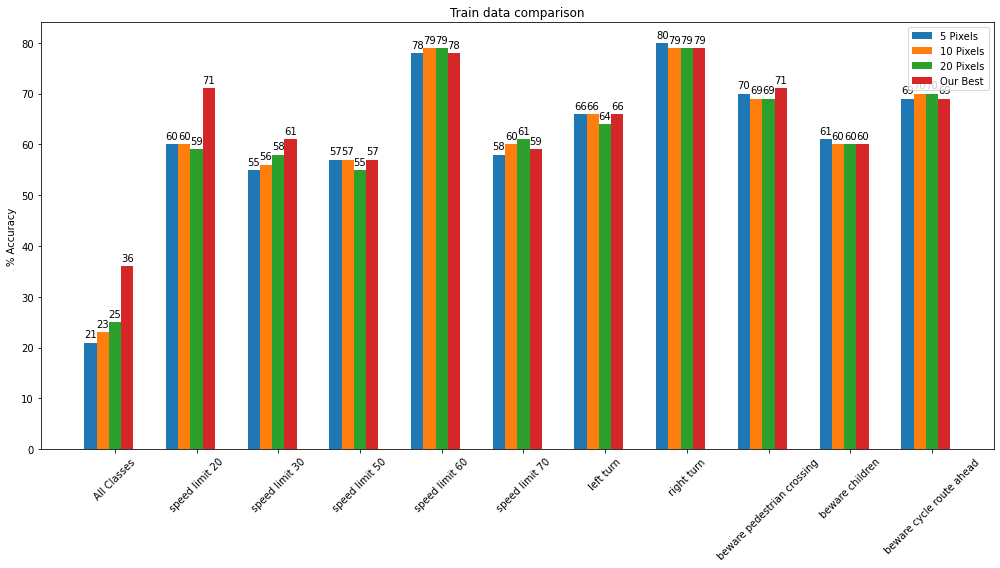

In [26]:
ps.plot_scores(train_data, ['5 Pixels','10 Pixels','20 Pixels','Our Best'], title='Train data comparison')
